In [2]:
#Install the python packages 
%%sh
pip install --upgrade pip --quiet
pip install boto3 botocore awscliv2 AHItoDICOMInterface --upgrade --quiet
python --version 



Python 3.10.6


In [3]:
#Restart the Kernel to take the new versions of awscliv2 in account.
import IPython
IPython.Application.instance().kernel.do_shutdown(True) #automatically restarts kernel

{'status': 'ok', 'restart': True}

In [2]:
from AHItoDICOMInterface.AHItoDICOM import AHItoDICOM

datastoreId = "713e4f5237a84bec991d283fa9a0788a" #Replace this value with your datastoreId.
imageSetId = "81bfc6aa3416912056e95188ab74870b" #Replace this value with your imageSetId.
studyInstanceUID = "1.3.6.1.4.1.19291.2.1.1.11401331443219758551361281482" #Replace this value with the studyInstanceUID of a study exisiting in the datastore.

helper=AHItoDICOM()
print("Listing ImageSets and Series info by StudyInstanceUID")
seriesdesc = helper.getImageSetToSeriesUIDMap(datastore_id=datastoreId , study_instance_uid=studyInstanceUID)

print("DICOMizing the ImageSet")
DICOMInstances = helper.DICOMizeImageSet(datastoreId,imageSetId)
print("exporting the instance 100 of the Study as PNG image")
helper.saveAsPngPIL(ds= DICOMInstances[99], destination=f"./image.png")



Listing ImageSets and Series info by StudyInstanceUID
DICOMizing the ImageSet
exporting the instance 100 of the Study as PNG image


True

In [4]:
#Format and display Series descriptions:

import ipywidgets as widgets
from IPython import display
import pandas as pd
import numpy as np

# sample data
df1 = pd.DataFrame(seriesdesc)

# create output widgets
widget1 = widgets.Output()
with widget1:
    display.display(df1)
hbox = widgets.HBox([widget1])

# render hbox
hbox

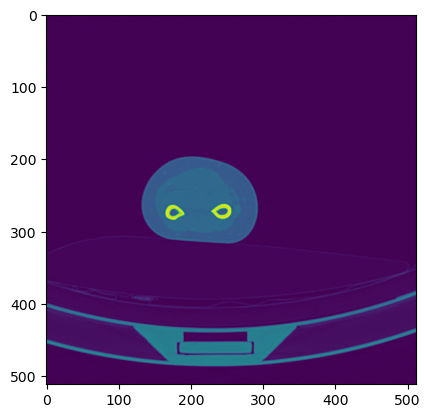

In [6]:
#Display the exported image

from PIL import Image
import matplotlib.pyplot as plt

img = Image.open('./image.png')
plt.imshow(img)

